In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Magnetic field study

## Load data

In [2]:
df = pd.read_csv("studies/field_study.csv")
df.head(2)

,steps,energy,magnetization,beta,configuration,activation,algo,grid_size,field
0,0,-2700,900,0.1,False,simultaneous,metropolis,30,-1
1,1,-588,92,0.1,False,simultaneous,metropolis,30,-1


## Data processing

In [3]:
df["magnetization_abs"] = np.abs(df["magnetization"])
df["magnetization_abs"] = df["magnetization_abs"]/(30*30) # magnetization per atom
df["energy"] = df["energy"]/(30*30) # energy per atom
df.head(2)

,steps,energy,magnetization,beta,configuration,activation,algo,grid_size,field,magnetization_abs
0,0,-3.000000,900,0.1,False,simultaneous,metropolis,30,-1,1.000000
1,1,-0.653333,92,0.1,False,simultaneous,metropolis,30,-1,0.102222


## Parameter evaluation

In [4]:
# betas in the study - use coolwarm colormap
betas = sorted(set(df.beta.value_counts().index))
normalize = plt.Normalize(min(betas), max(betas))
colormap = plt.cm.coolwarm
colors = colormap(normalize(betas))

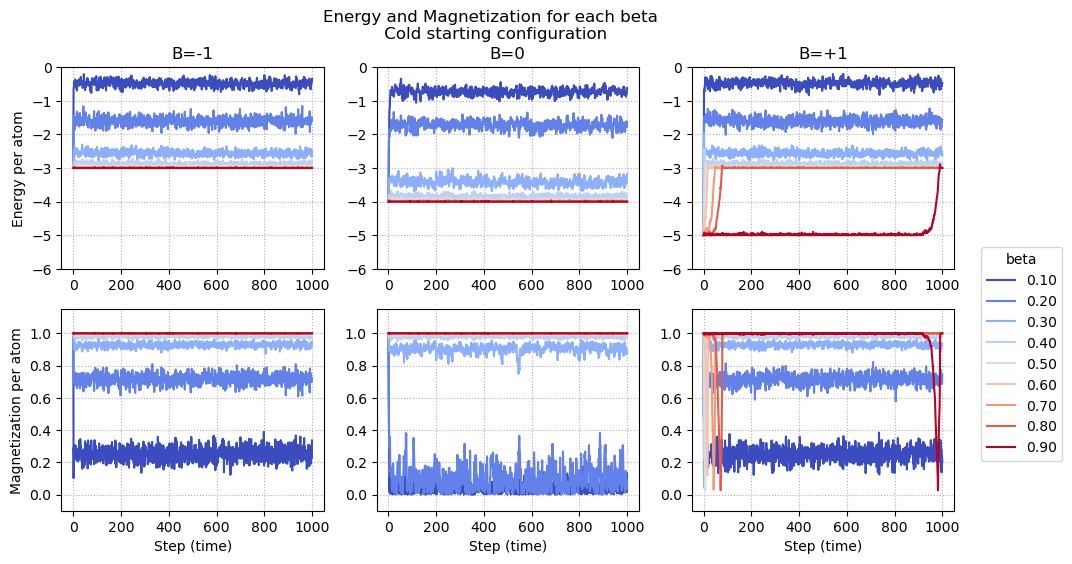

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(1.8*6.4, 1.2*4.8))

for beta, color in zip(betas, colors): # one line per temperature
    df_plot = df[df["beta"] == beta] 
    df_plot = df_plot[df_plot["configuration"]== False] # filter cold starting states

    # sort accroding to simulation step (time)
    df_plot_0 = df_plot[df_plot["field"] == 0]
    df_plot_0 = df_plot_0.sort_values(by="steps", ascending=True)
    
    df_plot_1 = df_plot[df_plot["field"] == 1]
    df_plot_1 = df_plot_1.sort_values(by="steps", ascending=True)

    df_plot_m1 = df_plot[df_plot["field"] == -1]
    df_plot_m1 = df_plot_m1.sort_values(by="steps", ascending=True)
    
    axs[0][0].plot(df_plot_m1["steps"], df_plot_m1["energy"], label=f'{beta:.2f}', color=color)
    axs[0][1].plot(df_plot_0["steps"], df_plot_0["energy"], label=f'{beta:.2f}', color=color)
    axs[0][2].plot(df_plot_1["steps"], df_plot_1["energy"], label=f'{beta:.2f}', color=color)

    axs[1][0].plot(df_plot_m1["steps"], df_plot_m1["magnetization_abs"], label=f'{beta:.2f}', color=color)
    axs[1][1].plot(df_plot_0["steps"], df_plot_0["magnetization_abs"], label=f'{beta:.2f}', color=color)
    axs[1][2].plot(df_plot_1["steps"], df_plot_1["magnetization_abs"], label=f'{beta:.2f}', color=color)

# ax1.legend()

fig.suptitle("Energy and Magnetization for each beta \n Cold starting configuration")

handles, labels = axs[0][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.58), title="beta")


axs[0][0].set_ylabel("Energy per atom")
axs[1][0].set_ylabel("Magnetization per atom")

axs[1][0].set_xlabel("Step (time)")
axs[1][1].set_xlabel("Step (time)")
axs[1][2].set_xlabel("Step (time)")

axs[0][0].grid(ls=':')
axs[0][1].grid(ls=':')
axs[0][2].grid(ls=':')

axs[1][0].grid(ls=':')
axs[1][1].grid(ls=':')
axs[1][2].grid(ls=':')

axs[0][0].set_title(f"B=-1")
axs[0][1].set_title(f"B=0")
axs[0][2].set_title(f"B=+1")

for ax in axs[0]:
    ax.set_ylim(-6, 0.0)

for ax in axs[1]:
    ax.set_ylim(-0.1, 1.15)

plt.show()

# Algo study

## Load data

In [6]:
df = pd.read_csv("studies/algo_study.csv")
df.head(2)

,steps,energy,magnetization,beta,configuration,activation,algo,grid_size,field
0,0,88,-46,0.48,True,random,metropolis,30,0
1,1,-1600,-46,0.48,True,random,metropolis,30,0


## Data processing

In [7]:
df["magnetization_abs"] = np.abs(df["magnetization"])
df["magnetization_abs"] = df["magnetization_abs"]/(30*30) # magnetization per atom
df["energy"] = df["energy"]/(30*30) # energy per atom
df.head(2)

,steps,energy,magnetization,beta,configuration,activation,algo,grid_size,field,magnetization_abs
0,0,0.097778,-46,0.48,True,random,metropolis,30,0,0.051111
1,1,-1.777778,-46,0.48,True,random,metropolis,30,0,0.051111


## Parameter evaluation

In [8]:
activations = ["random","simultaneous"]  # activation function
algos = ["metropolis", "heat_bath"]

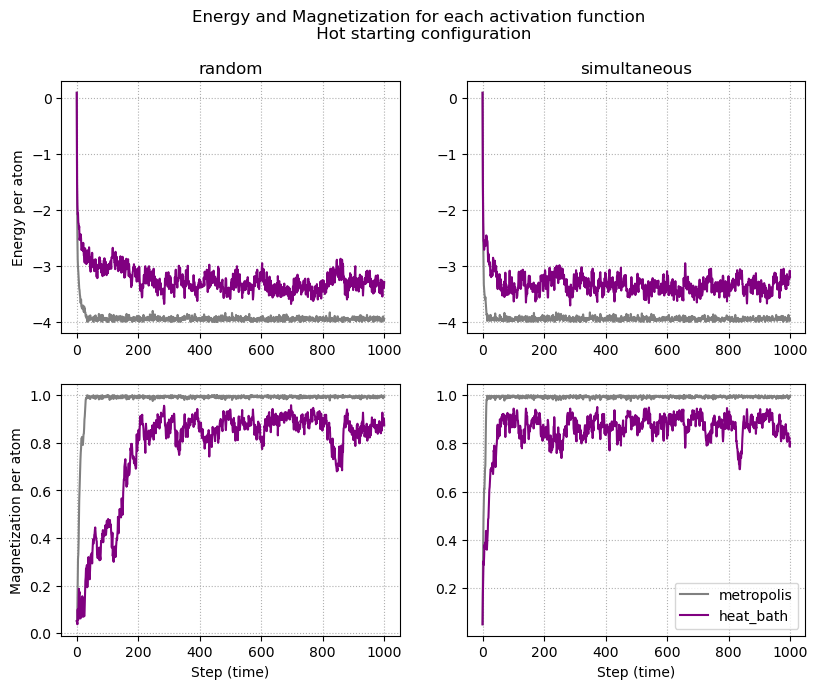

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(1.5*6.4, 1.5*4.8))

for activation, i in zip(activations, [0,1]): # one line per temperature
    df_plot = df[df["activation"] == activation] 
    
    # sort accroding to simulation step (time)
    df_plot_metropolis = df_plot[df_plot["algo"] == "metropolis"]
    df_plot_heatbath = df_plot[df_plot["algo"] == "heat_bath"]
    
    df_plot_metropolis = df_plot_metropolis.sort_values(by="steps", ascending=True)
    df_plot_heatbath = df_plot_heatbath.sort_values(by="steps", ascending=True)
    
    axs[0][i].plot(df_plot_metropolis["steps"], df_plot_metropolis["energy"], label='metropolis', color="grey")
    axs[0][i].plot(df_plot_heatbath["steps"], df_plot_heatbath["energy"], label=f'heat_bath', color="purple")
    axs[0][i].set_title(activation)
    axs[0][i].grid(ls=":")

    axs[1][i].plot(df_plot_metropolis["steps"], df_plot_metropolis["magnetization_abs"], label='metropolis', color="grey")
    axs[1][i].plot(df_plot_heatbath["steps"], df_plot_heatbath["magnetization_abs"], label=f'heat_bath', color="purple")
    axs[1][i].grid(ls=":")

axs[1][1].legend()

fig.suptitle("Energy and Magnetization for each activation function \n Hot starting configuration")


axs[0][0].set_ylabel("Energy per atom")
axs[1][0].set_ylabel("Magnetization per atom")

axs[1][0].set_xlabel("Step (time)")
axs[1][1].set_xlabel("Step (time)")
# axs[1][2].set_xlabel("Step (time)")

# axs[0][0].set_title(f"B=-1")
# axs[0][1].set_title(f"B=0")
# axs[0][2].set_title(f"B=+1")


plt.show()

# Critical temp study

## Load data

In [10]:
df = pd.read_csv("studies/critical_temp_study.csv")
df.head(2)

,steps,energy,magnetization,beta,configuration,activation,algo,grid_size,field
0,0,88,-46,0.4,True,random,metropolis,30,0
1,1,-1648,-118,0.4,True,random,metropolis,30,0


## Data processing

In [11]:
df["magnetization_abs"] = np.abs(df["magnetization"])
df["magnetization_abs"] = df["magnetization_abs"]/(30*60) # magnetization per atom
df["energy"] = df["energy"]/(30*30) # energy per atom
df.head(2)

,steps,energy,magnetization,beta,configuration,activation,algo,grid_size,field,magnetization_abs
0,0,0.097778,-46,0.4,True,random,metropolis,30,0,0.025556
1,1,-1.831111,-118,0.4,True,random,metropolis,30,0,0.065556


## Parameter evaluation

In [12]:
# betas in the study - use coolwarm colormap
betas = sorted(set(df.beta.value_counts().index))
normalize = plt.Normalize(min(betas), max(betas))
colormap = plt.cm.coolwarm
colors = colormap(normalize(betas))

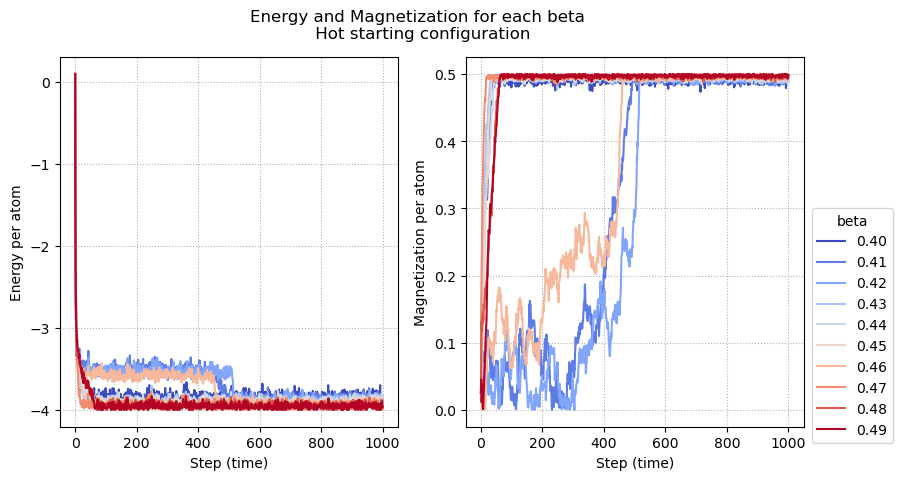

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(1.5*6.4, 4.8))

for beta, color in zip(betas, colors): # one line per temperature
    df_plot = df[df["beta"] == beta] 
    df_plot = df_plot[df_plot["configuration"]] # filter hot starting states

    # sort accroding to simulation step (time)
    df_plot = df_plot.sort_values(by="steps", ascending=True)
    df_plot = df_plot[df_plot["steps"] >=0]

    ax1.plot(df_plot["steps"], df_plot["energy"], label=f'{beta:.2f}', color=color)
    ax2.plot(df_plot["steps"], df_plot["magnetization_abs"], label=f'{beta:.2f}', color=color)

# ax1.legend()

fig.suptitle("Energy and Magnetization for each beta \n Hot starting configuration")

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.58), title="beta")


ax1.set_ylabel("Energy per atom")
ax2.set_ylabel("Magnetization per atom")

ax1.set_xlabel("Step (time)")
ax2.set_xlabel("Step (time)")

ax1.grid(ls=':')
ax2.grid(ls=':')

plt.show()

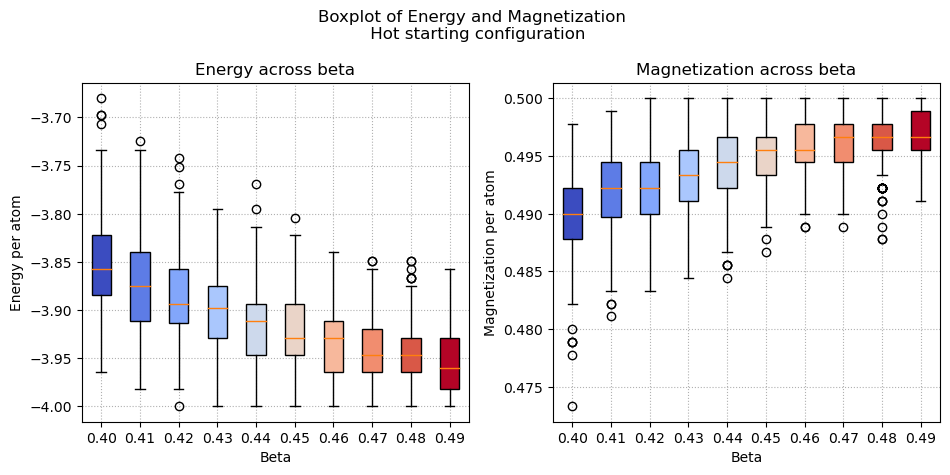

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(1.5*6.4, 4.8))

# aggregate for boxplots
energy_data = []
magnetization_data = []
for beta in betas:
    df_plot = df[(df["beta"] == beta) & (df["configuration"]) & (df["steps"]>600)]  # filter beta and hot configuration
    
    energy_data.append(df_plot["energy"].tolist())
    magnetization_data.append(df_plot["magnetization_abs"].tolist())

# boxplots
bp1 = ax1.boxplot(energy_data, patch_artist=True)
bp2 = ax2.boxplot(magnetization_data, patch_artist=True)

# applying colors to the boxes
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)

# set titles, etc.
fig.suptitle("Boxplot of Energy and Magnetization \n Hot starting configuration")

ax1.set_title("Energy across beta")
ax2.set_title("Magnetization across beta")

ax1.set_xlabel("Beta")
ax2.set_xlabel("Beta")

ax1.set_ylabel("Energy per atom")
ax2.set_ylabel("Magnetization per atom")

# beta ticks
ax1.set_xticks(np.arange(1, len(betas) + 1))
ax1.set_xticklabels([f"{beta:.2f}" for beta in betas])
ax2.set_xticks(np.arange(1, len(betas) + 1))
ax2.set_xticklabels([f"{beta:.2f}" for beta in betas])

ax1.grid(ls=':')
ax2.grid(ls=':')

plt.tight_layout()
plt.show()
